<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L2_Multiclass_classification_with_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (8000, 784)
Number of classes: 10


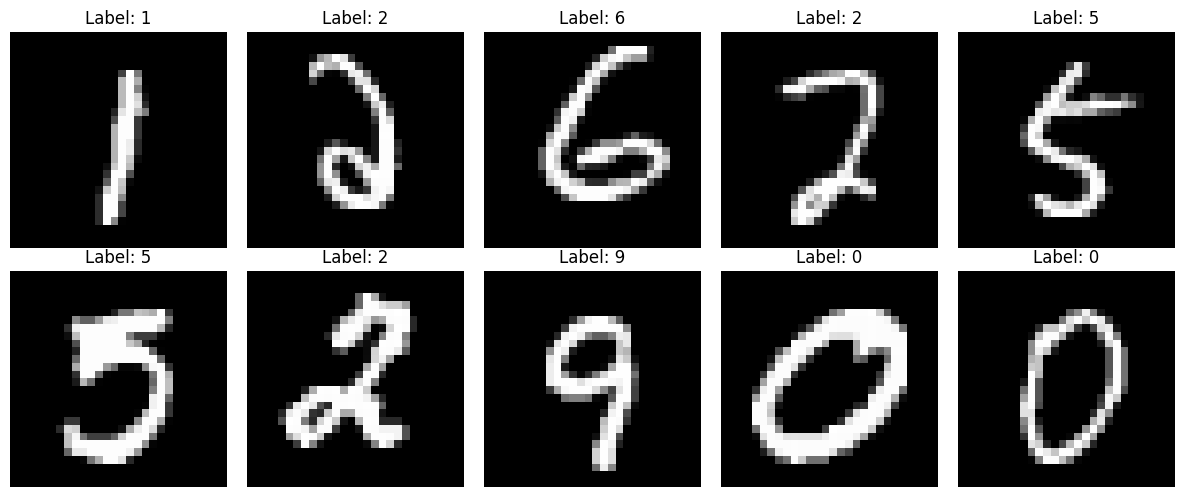

Training softmax regression model...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Softmax model accuracy: 0.9075 or 90.8%


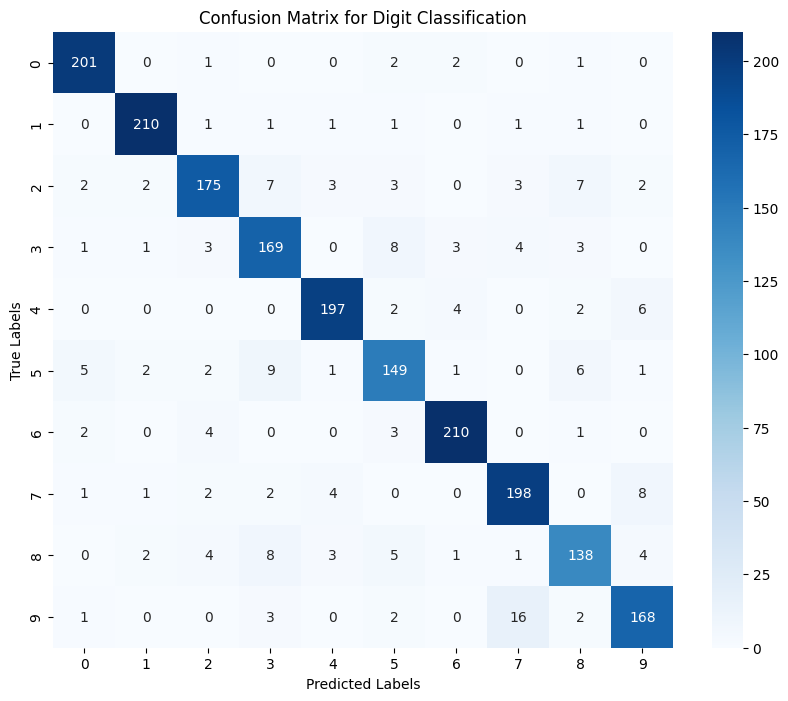


Training a simple neural network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural network accuracy: 0.9460 or 94.6%


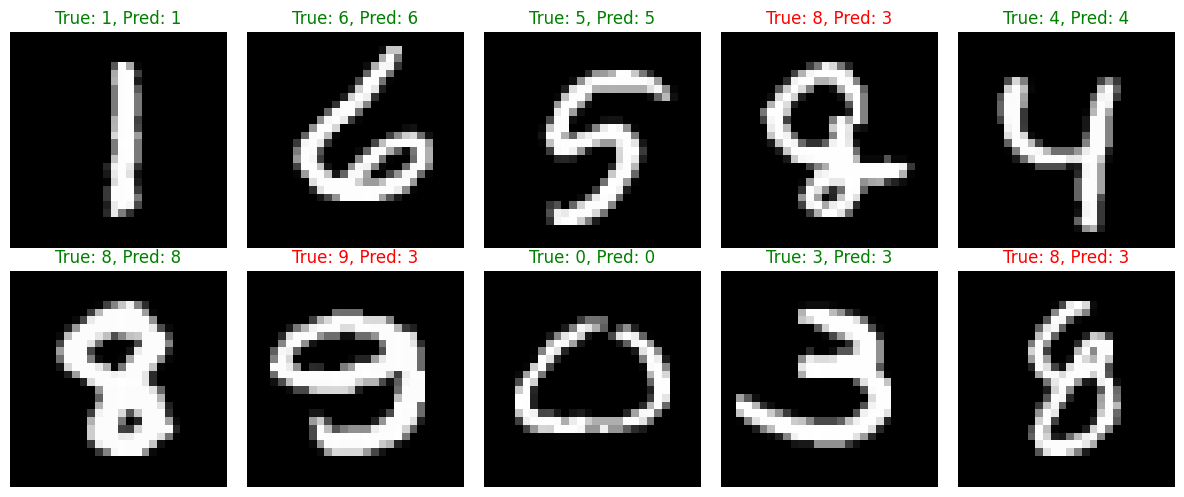

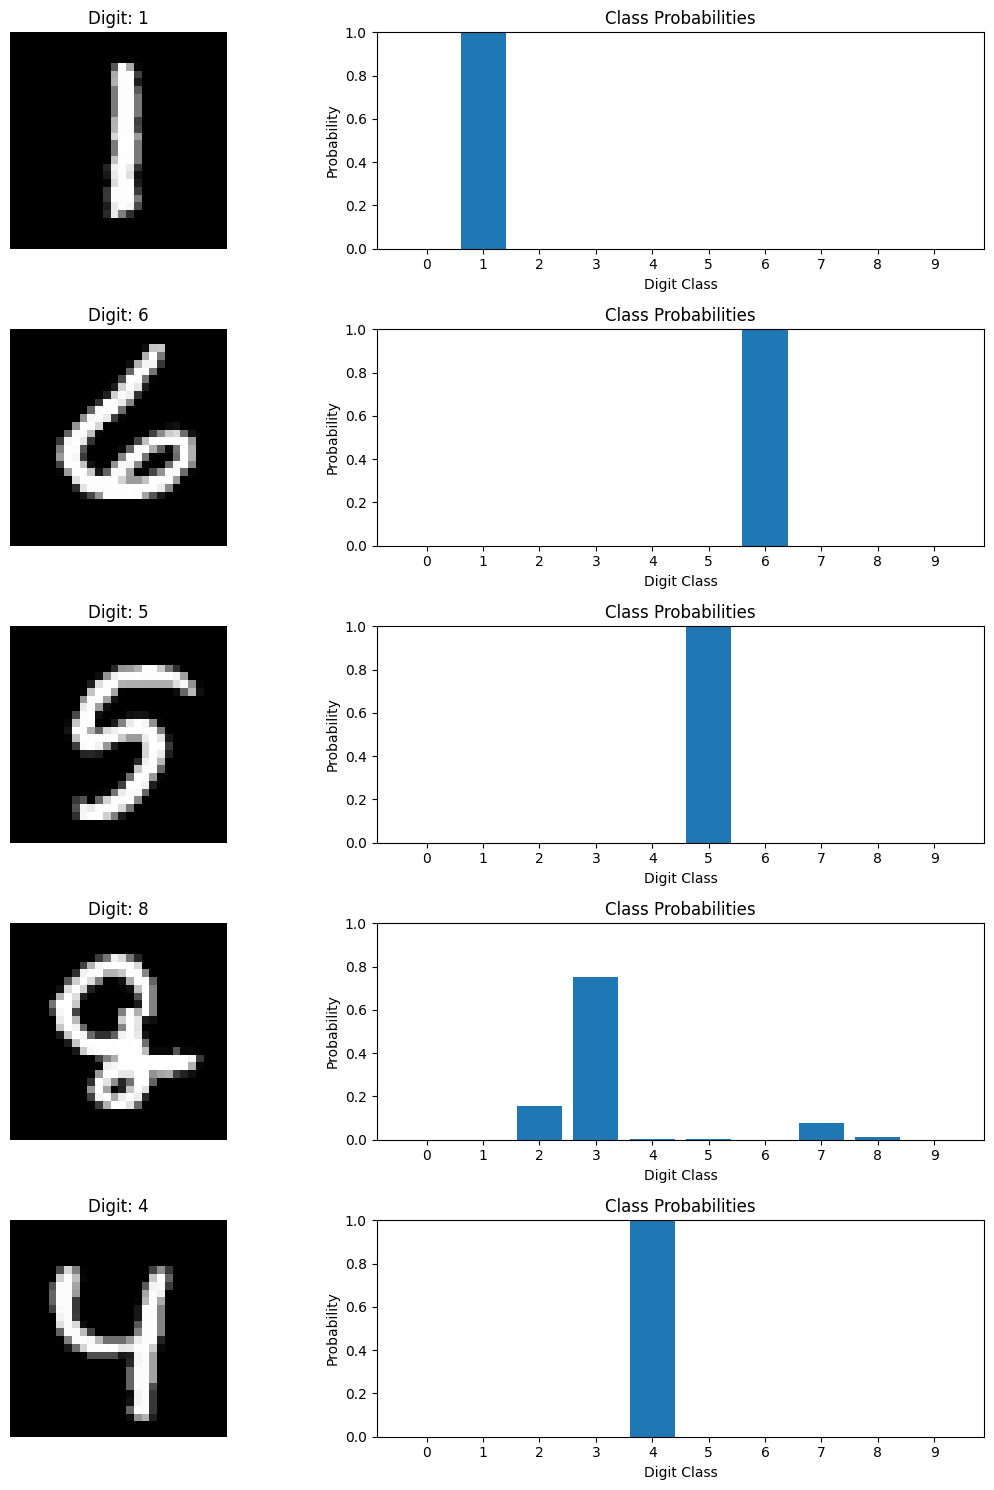

In [1]:
# Handwritten Digit Recognition Example
# This code demonstrates multiclass classification with the MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 1. Load the MNIST dataset (a smaller subset for quicker execution)
# This dataset contains images of handwritten digits (0-9)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X = X / 255.0  # Scale pixel values to between 0 and 1

# To make the example run faster, let's use a smaller subset
# In a real project, you might use all the data
n_samples = 10000  # Using only 10,000 samples instead of all 70,000
X_sample = X[:n_samples]
y_sample = y[:n_samples]

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# 3. Visualize some examples of the digits
def plot_digits(X, y, indices):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.ravel()

    for i, index in enumerate(indices):
        axes[i].imshow(X[index].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {y[index]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Show 10 random examples
random_indices = np.random.choice(len(X_train), size=10, replace=False)
plot_digits(X_train, y_train, random_indices)

# 4. Train a simple model (Softmax Regression)
# For a real project, you might use neural networks which often perform better
# But softmax regression is simpler to understand
print("Training softmax regression model...")
# Using 'multinomial' option enables softmax regression
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                                   C=10, max_iter=100, random_state=42)
softmax_model.fit(X_train, y_train)

# 5. Evaluate the model
y_pred = softmax_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Softmax model accuracy: {accuracy:.4f} or {accuracy*100:.1f}%")

# 6. Visualize the confusion matrix to see where the model makes mistakes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Digit Classification')
plt.show()

# 7. Let's also try a simple neural network for comparison
print("\nTraining a simple neural network...")
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
nn_model.fit(X_train, y_train)

nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
print(f"Neural network accuracy: {nn_accuracy:.4f} or {nn_accuracy*100:.1f}%")

# 8. Visualize some predictions from the softmax model
def plot_predictions(X, y_true, y_pred, indices):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.ravel()

    for i, index in enumerate(indices):
        axes[i].imshow(X[index].reshape(28, 28), cmap='gray')
        color = 'green' if y_pred[index] == y_true[index] else 'red'
        axes[i].set_title(f"True: {y_true[index]}, Pred: {y_pred[index]}", color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Show some examples with their predictions
random_test_indices = np.random.choice(len(X_test), size=10, replace=False)
plot_predictions(X_test, y_test, y_pred, random_test_indices)

# 9. Show probability distributions for a few examples
def plot_probabilities(X, y_true, model, indices):
    probs = model.predict_proba(X[indices])

    fig, axes = plt.subplots(len(indices), 2, figsize=(12, 3*len(indices)))

    for i, idx in enumerate(range(len(indices))):
        # Plot the digit
        axes[i, 0].imshow(X[indices[idx]].reshape(28, 28), cmap='gray')
        axes[i, 0].set_title(f"Digit: {y_true[indices[idx]]}")
        axes[i, 0].axis('off')

        # Plot the probability distribution
        axes[i, 1].bar(range(10), probs[idx])
        axes[i, 1].set_xticks(range(10))
        axes[i, 1].set_xlabel('Digit Class')
        axes[i, 1].set_ylabel('Probability')
        axes[i, 1].set_ylim(0, 1)
        axes[i, 1].set_title('Class Probabilities')

    plt.tight_layout()
    plt.show()

# Show probabilities for 5 examples
plot_indices = random_test_indices[:5]
plot_probabilities(X_test, y_test, softmax_model, plot_indices)
